In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

In [ ]:
# Load the dataset
data = pd.read_csv('train.csv')
data.drop('ID', axis=1)
data = data.dropna()
data.head()

,ID,n0,n1,n2,n3,n4,n5,n6,n7,n8,...,n4087,n4088,n4089,n4090,n4091,n4092,n4093,n4094,n4095,category
0,0,0.0,0.000000,1.272801,0.290501,0.581446,0.000000,0.000000,0,0.000000,...,1.645888,0.869640,0.302432,0.953719,0.022545,0.498048,0.0,0.034988,0.692382,Orange_Ripe
1,1,0.0,0.000000,1.542096,0.000000,0.896557,0.049978,0.000000,0,0.117847,...,1.504220,0.622686,0.588427,0.524415,0.305426,0.386204,0.0,0.000000,0.668196,Banana_Ripe
2,2,0.0,0.000000,1.098595,0.571866,0.500355,0.000000,0.000000,0,0.493137,...,1.169341,0.913239,0.064404,0.531270,0.000000,0.471604,0.0,0.000000,0.658250,Mango_Raw
3,3,0.0,0.101666,1.159194,0.599216,0.893206,0.000000,0.200139,0,0.645675,...,0.560686,1.243676,0.432523,0.701881,0.000000,0.589985,0.0,0.000000,0.591165,Leeche_Raw
4,4,0.0,0.000000,1.178603,0.362568,0.577602,0.000000,0.000000,0,0.079862,...,1.206032,0.736831,0.345906,0.878515,0.119000,0.261441,0.0,0.000000,0.458905,Mango_Ripe


In [ ]:
# Split data into features and target
y_train = data['category'].values
X_train = data.drop(['ID','category'], axis=1).values

In [ ]:
pca = PCA(n_components=400)
X_train = pca.fit_transform(X_train)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
lda = LDA(n_components=19)
X_train = lda.fit_transform(X_train, y_train)

In [17]:
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.05)
y_pred = lof.fit_predict(X_train)
outliers = np.where(y_pred == -1)[0]
print("Outliers:", outliers)
print('Number of outliers:', len(outliers))

Outliers: [  23   87   97  126  130  142  143  146  158  166  171  217  270  282
  283  306  316  343  356  383  389  390  400  401  405  406  427  440
  464  467  542  552  598  599  615  660  675  711  746  760  792  807
  848  855  873  879  896  934  935  957  990 1006 1009 1074 1096 1101
 1135 1143]
Number of outliers: 58


In [18]:
X_train = np.delete(X_train, outliers, axis=0)
y_train = np.delete(y_train, outliers, axis=0)

In [19]:
test_data = pd.read_csv("test.csv")
test_data = test_data.dropna()

X_test = test_data.drop(['ID'], axis=1).values

X_test = pca.transform(X_test)
X_test = lda.transform(X_test)

For n_clusters = 2, the average silhouette_score is: 0.17
For n_clusters = 3, the average silhouette_score is: 0.17
For n_clusters = 4, the average silhouette_score is: 0.25
For n_clusters = 5, the average silhouette_score is: 0.24
For n_clusters = 6, the average silhouette_score is: 0.19
For n_clusters = 7, the average silhouette_score is: 0.26
For n_clusters = 8, the average silhouette_score is: 0.29


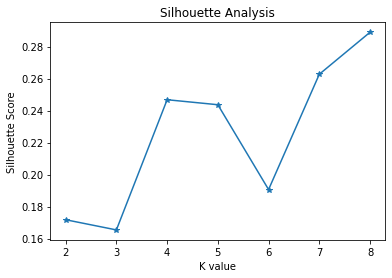

The objective function value when c = 3 is 10344.46


In [20]:
#Question 2
#References: https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670
#References: Also took help of chatGPT for some parts of the code
import numpy as np
import matplotlib.pyplot as plt

#returns a copy of X with shuffled rows, with only the first k rows retained as the initial centroids for k-means clustering.
def initialize_centroids(X, k):
    centroids = X.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

#calculates the Euclidean distance between them.
def euclideandistanceformula(a, b):
    return np.sqrt(np.sum((a - b)**2))

#It first initializes the centroids using the initialize_centroids function, then iteratively assigns data points to their nearest centroid and
#updates the centroids until the maximum number of iterations is reached. It returns an array of cluster labels for each data point.
def kmeans(X, k, iteration):
    centroids = initialize_centroids(X, k)
    for i in range(iteration):
        # Assign points to nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        cluster_labels = np.argmin(distances, axis=0)
        # Update centroids
        for j in range(k):
            centroids[j] = np.mean(X[cluster_labels == j], axis=0)
    return cluster_labels

#updates the membership values for each data point and cluster using the fuzzy c-means algorithm. It first calculates the distances between each data point and each centroid, 
#then calculates the membership powers for each point and cluster. It then normalizes the membership powers and returns the updated membership matrix
def update_membership(X, U, centroids, m, beta):
    c = centroids.shape[0]
    distances = np.zeros((X.shape[0], c))
    for j in range(c):
        distances[:, j] = np.apply_along_axis(euclideandistanceformula, 1, X, centroids[j, :])
    membership_powers = np.divide(1, np.power(distances, 2 * (m-1) * beta))
    U_new = np.divide(membership_powers, np.sum(membership_powers, axis=1).reshape(-1, 1))
    return U_new



#It first calculates the average distance from each data point to other data points in the same cluster (a) and the average distance from each data point 
#to data points in the nearest other cluster (b). It then calculates the silhouette coefficient for each data point and returns the average of these coefficients.
def silhouette_coefficient(X, cluster_labels, k):
    a = np.zeros(X.shape[0])
    b = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        a[i] = np.mean(np.sqrt(np.sum((X[i] - X[cluster_labels == cluster_labels[i]])**2, axis=1)))
        b[i] = np.min([np.mean(np.sqrt(np.sum((X[i] - X[cluster_labels == j])**2, axis=1))) for j in range(k) if j != cluster_labels[i]])
    s_coefficients = (b - a) / np.maximum(a, b)
    return np.mean(s_coefficients)


#returns a random membership matrix U of size m by c, where m is the number of data points in X. It normalizes the membership values so that they sum to 1 for each data point.
def initialize_membership(X, c):
    m = X.shape[0]
    U = np.random.random((m, c))
    U = np.divide(U, np.sum(U, axis=1).reshape(-1, 1))
    return U


#It initializes the membership matrix using the initialize_membership function, then iteratively updates the centroids and membership values until the 
#maximum number of iterations is reached or the objective function value converges. It returns the final centroids, membership matrix, and objective function value.
def fuzzy_cmeans(X, c, m, beta, iteration):
    J = np.inf
    centroids = np.zeros((c, X.shape[1]))
    U = initialize_membership(X, c)
    for i in range(iteration):
        centroids = update_centroids(X, U, m)
        U_new = update_membership(X, U, centroids, m, beta)
        J_new = objective_function(X, U_new, centroids, m, beta)
        if np.abs(J - J_new) < 1e-6:
            break
        U = U_new
        J = J_new
    return centroids, U, J


#It first calculates the weighted sum of data points for each cluster, where the weight is the membership value raised to the mth power. 
#It then normalizes the sum of weights for each cluster and returns the updated centroids
def update_centroids(X, U, m):
    c = U.shape[1]
    centroids = np.zeros((c, X.shape[1]))
    for j in range(c):
        centroids[j, :] = np.sum((U[:, j]**m).reshape(-1, 1) * X, axis=0)
        centroids[j, :] = centroids[j, :] / np.sum(U[:, j]**m)
    return centroids


#It first calculates the distances between each data point and each centroid, then multiplies the distances by the membership values raised to the mth power 
#and the beta value. It then sums these values for all data points and returns the result.
def objective_function(X, U, centroids, m, beta):
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for j in range(centroids.shape[0]):
        distances[:, j] = np.apply_along_axis(euclideandistanceformula, 1, X, centroids[j, :])
    J = np.sum(U**m * distances**2 * beta)
    return J

# Load the data directly from file
Data = X_train



# Test K values from 2 to 5
silhouette_scores = []
for k in range(2, 9):
    cluster_labels = kmeans(Data, k, iteration=100)
    silhouette_score = silhouette_coefficient(Data, cluster_labels, k)
    silhouette_scores.append(silhouette_score)
    print(f"For n_clusters = {k}, the average silhouette_score is: {silhouette_score:.2f}")



# Plot the silhouette scores
plt.plot(range(2, 9), silhouette_scores, marker='*')
plt.title('Silhouette Analysis')
plt.xlabel('K value')
plt.ylabel('Silhouette Score')
plt.show()

# Test with c = 3, m = 2, and beta = 0.3
beta = 0.3
c = 3 #This is optimal K value
m = 2

centroids, U, J = fuzzy_cmeans(Data, c, m, beta, iteration=100) 

print(f"The objective function value when c = {c} is {J:.2f}")

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(X_train) 

X_train = np.column_stack((X_train, kmeans.labels_))
X_test = np.column_stack((X_test, kmeans.predict(X_test)))


KeyboardInterrupt



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42) #By default, the n_estimators value is 100
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
pred = pd.DataFrame(y_pred,columns=["Category"])
sub = pd.concat([test_data.ID,pred],axis=1)
sub.set_index('ID',inplace=True)
sub.to_csv(f"Submission.csv")
